In [17]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load data into pandas DataFrame
kaggle = pd.read_csv('mock_kaggle.csv')

# Rename columns of the DataFrame
kaggle.rename(columns={'data': 'Date', 'venda': 'UnitsSold', 'estoque': 'Stock', 'preco': 'Price'}, inplace=True)

# Create new column to calculate revenue
kaggle['Revenue'] = kaggle['UnitsSold'] * kaggle['Price']

# Convert dates in a column into months
kaggle['Month'] = pd.to_datetime(kaggle['Date']).dt.month_name()

# Identify which dates in a column correspond to which weekdays
kaggle['Day_of_Week'] = pd.to_datetime(kaggle['Date']).dt.day_name()

# Assign seasons to the corresponding months
kaggle['Month_Num'] = pd.to_datetime(kaggle['Date']).dt.month
kaggle['Season'] = np.where(kaggle['Month_Num'].isin([12, 1, 2]), 'Winter',
                             np.where(kaggle['Month_Num'].isin([3, 4, 5]), 'Spring',
                                      np.where(kaggle['Month_Num'].isin([6, 7, 8]), 'Summer', 'Fall')))


#Print the database
kaggle








,Date,UnitsSold,Stock,Price,Revenue,Month,Day_of_Week,Month_Num,Season
0,2014-01-01,0,4972,1.29,0.00,January,Wednesday,1,Winter
1,2014-01-02,70,4902,1.29,90.30,January,Thursday,1,Winter
2,2014-01-03,59,4843,1.29,76.11,January,Friday,1,Winter
3,2014-01-04,93,4750,1.29,119.97,January,Saturday,1,Winter
4,2014-01-05,96,4654,1.29,123.84,January,Sunday,1,Winter
...,...,...,...,...,...,...,...,...,...
932,2016-07-27,98,3179,2.39,234.22,July,Wednesday,7,Summer
933,2016-07-28,108,3071,2.39,258.12,July,Thursday,7,Summer
934,2016-07-29,128,4095,2.39,305.92,July,Friday,7,Summer
935,2016-07-30,270,3825,2.39,645.30,July,Saturday,7,Summer


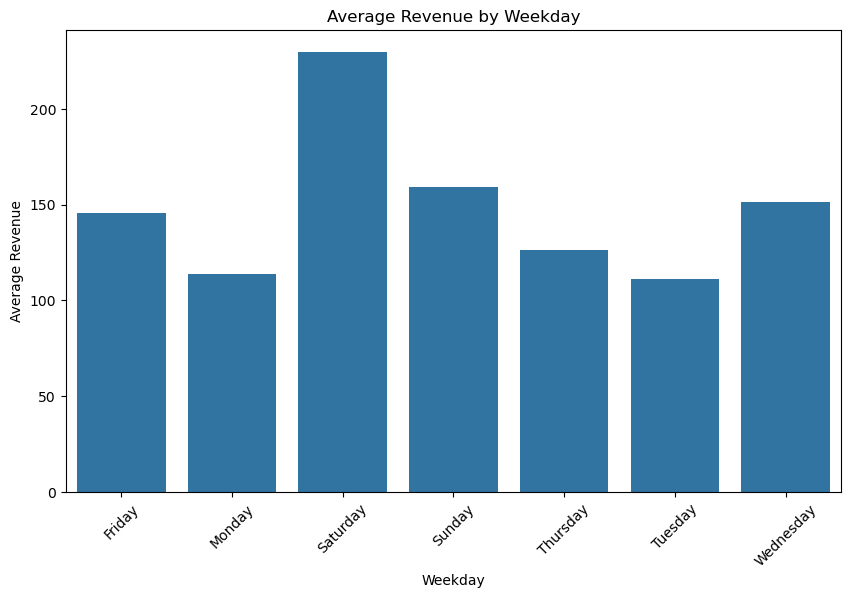

In [19]:
# Calculate the Average Revenue by Weekday
avg_revenue_weekday = kaggle.groupby('Day_of_Week')['Revenue'].mean().reset_index()

# Plot a histogram based on the Average Revenue by Weekday
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_revenue_weekday, x='Day_of_Week', y='Revenue')
plt.title('Average Revenue by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Average Revenue')
plt.xticks(rotation=45)
plt.show()

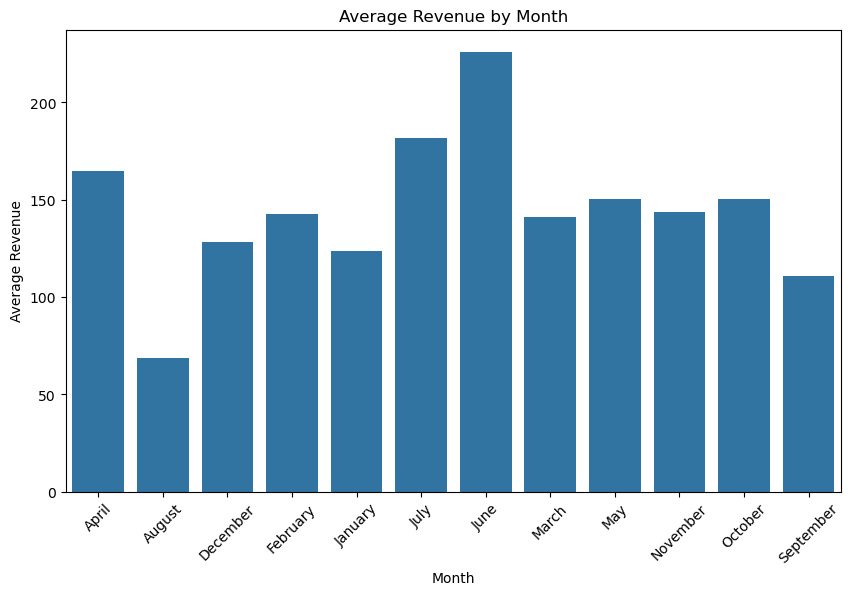

In [21]:
# Calculate the Average Revenue by Month
avg_revenue_month = kaggle.groupby('Month')['Revenue'].mean().reset_index()

# Plot a histogram based on the Average Revenue by Month
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_revenue_month, x='Month', y='Revenue')
plt.title('Average Revenue by Month')
plt.xlabel('Month')
plt.ylabel('Average Revenue')
plt.xticks(rotation=45)
plt.show()

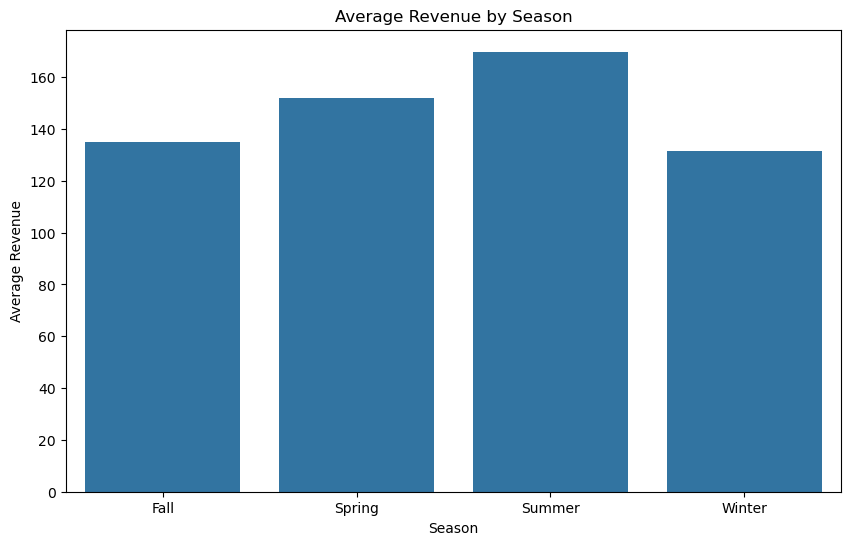

In [23]:
# Calculate the Average Revenue by Season
avg_revenue_season = kaggle.groupby('Season')['Revenue'].mean().reset_index()

# Plot a histogram based on the Average Revenue by Season
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_revenue_season, x='Season', y='Revenue')
plt.title('Average Revenue by Season')
plt.xlabel('Season')
plt.ylabel('Average Revenue')
plt.show()

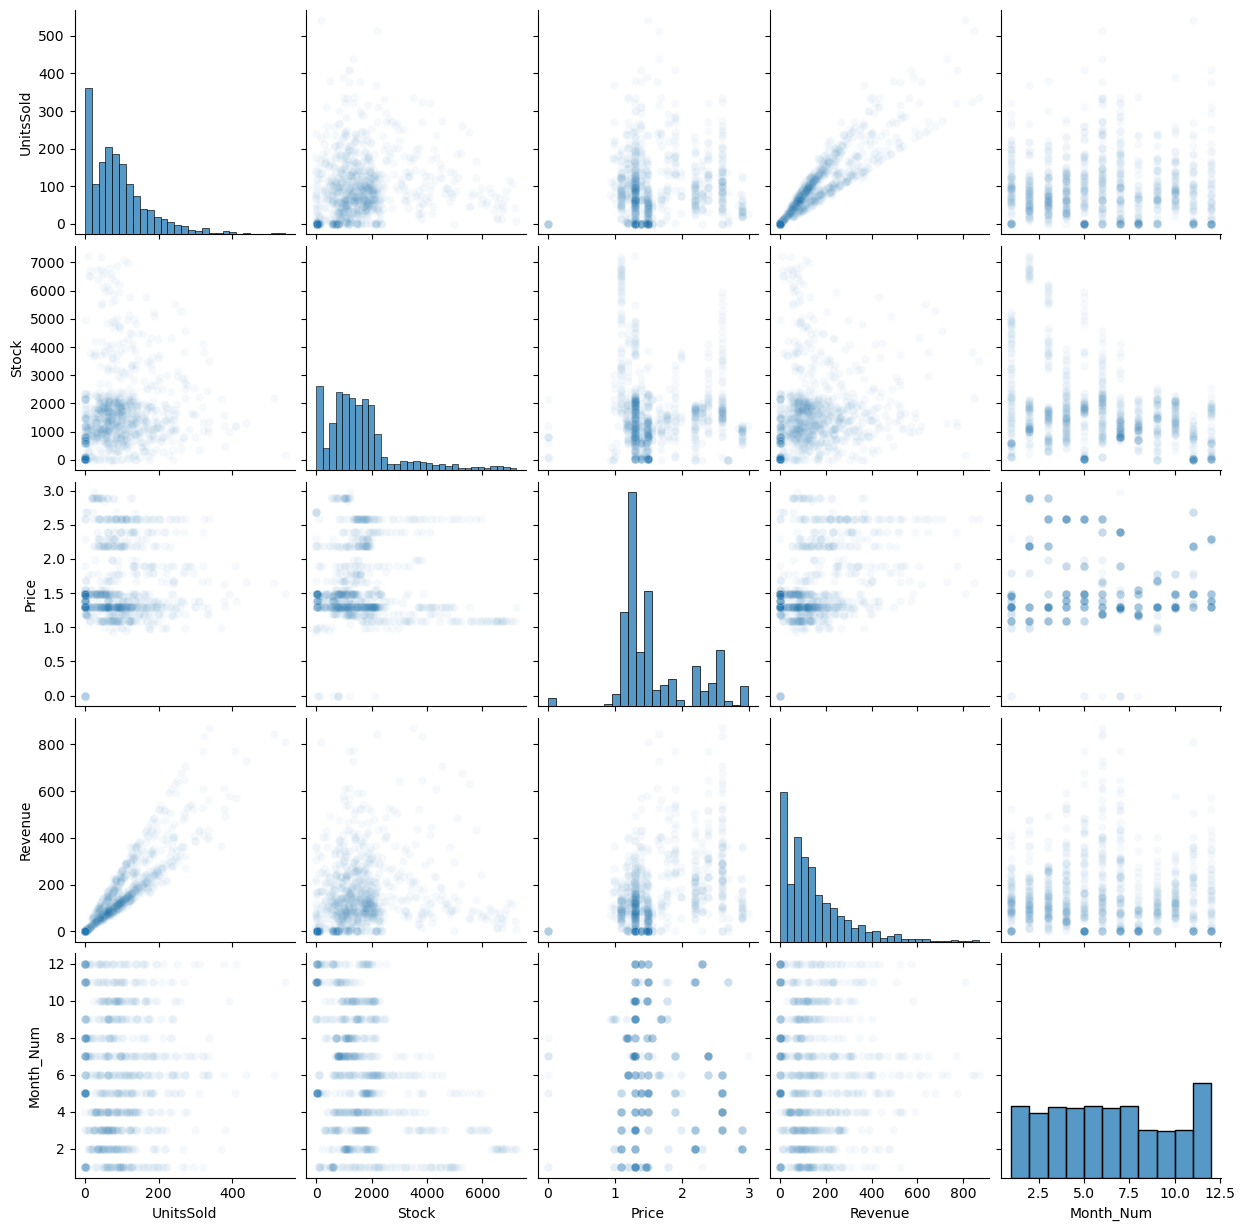

In [29]:
sns.pairplot(kaggle, kind='scatter', plot_kws = {'alpha':0.04})

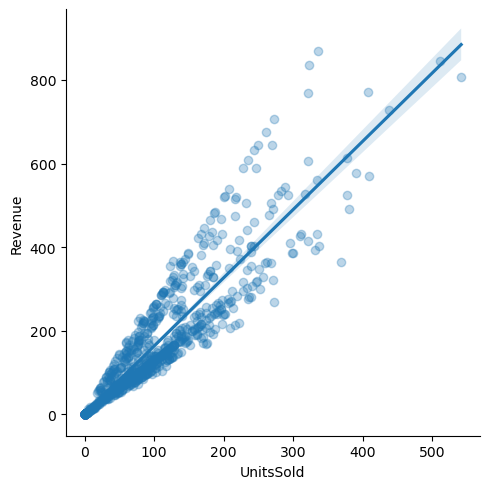

In [49]:
sns.lmplot(x='UnitsSold',
           y='Revenue', 
           data=kaggle,
           scatter_kws={'alpha': 0.3})


In [51]:
from sklearn.model_selection import train_test_split

In [61]:
x = kaggle[['UnitsSold','Price','Stock']]
y = kaggle['Revenue']

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [77]:
#training the model
from sklearn.linear_model import LinearRegression

In [79]:
ln = LinearRegression()

In [81]:
ln.fit(x_train, y_train)

LinearRegression()

In [83]:
ln.coef_

array([1.54789916e+00, 8.10959478e+01, 2.00678590e-03])

In [93]:
cdf = pd.DataFrame(ln.coef_, x.columns, columns=['Coef'])
cdf

,Coef
UnitsSold,1.547899
Price,81.095948
Stock,0.002007


In [97]:
#predictions
predictions = ln.predict(x_test)
predictions

array([-2.05811018e+01,  6.21706399e+01,  7.21179297e+01,  3.77662229e+02,
        1.70013478e+02,  1.59305292e+02,  1.98262857e+02,  1.53478263e+02,
        2.66997565e+01, -2.05811018e+01,  1.81417734e+02,  1.31374570e+02,
       -1.29974630e+01, -1.24735138e+01,  8.55371351e+01, -1.13095780e+01,
       -1.24674935e+01,  8.05494540e+02,  2.45498709e+02,  8.26304639e+01,
        4.13373914e+02,  4.09054255e+02,  4.94201060e+02,  5.30537350e+02,
       -2.05811018e+01,  2.04891831e+02,  2.19005759e+02,  5.74253183e+02,
        8.92351258e+01,  1.19406781e+02,  3.09318449e+01,  1.09472539e+02,
        6.27503135e+00,  1.75538827e+02,  7.93620820e+01,  2.22944646e+02,
        1.65482555e+02,  1.24251157e+02,  2.38761091e+02,  5.71135394e+01,
        1.03025720e+02, -4.36191226e+00,  2.23364914e+02,  1.50980407e+02,
       -2.21492469e+01,  1.23437429e+02,  2.21832713e+02,  4.71351429e+01,
        2.84320249e+02, -1.90291891e+01, -1.45941922e+01, -2.80464640e+00,
        7.39508190e+01,  

Text(0.5, 1.0, 'Evaluation of LM Model')

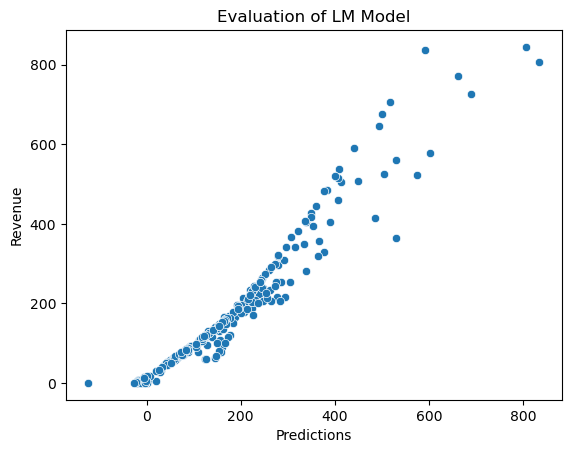

In [115]:
sns.scatterplot(x=predictions,y=y_test)
plt.xlabel('Predictions')
plt.title('Evaluation of LM Model')

In [119]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [123]:
print('Mean Absolute Error: ', mean_absolute_error(y_test, predictions))
print('Mean Squared Error: ', mean_squared_error(y_test, predictions))
print('RMSE: ',math.sqrt(mean_squared_error(y_test, predictions)))

Mean Absolute Error:  24.03645989362833
Mean Squared Error:  1745.499309615105
RMSE:  41.77917315619237


In [127]:
#residuals
residuals = y_test - predictions

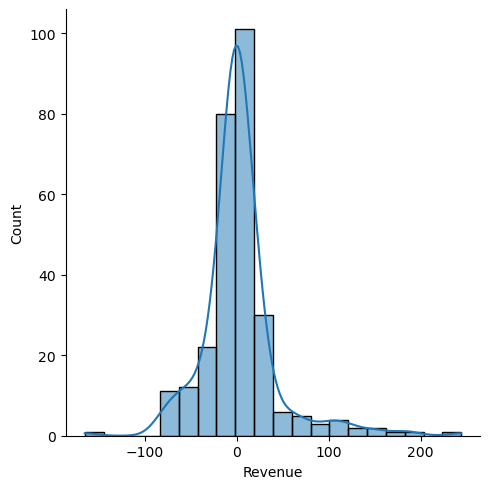

In [131]:
sns.displot(residuals, bins=20, kde=True)

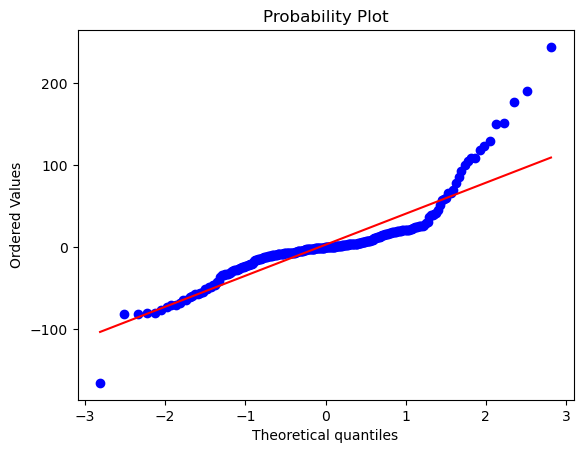

In [137]:
import pylab
import scipy.stats as stats

stats.probplot(residuals, dist='norm', plot=pylab)
pylab.show()

In [15]:
# Pearson Correlation
correlation = kaggle[['Revenue', 'UnitsSold']].corr().iloc[0, 1]
print(f"Pearson Correlation Between Revenue and Sales: {correlation}")


Pearson Correlation Between Revenue and Sales: 0.9121267504026158


In [140]:
# Predicting Revenue based on 5000 units sold
units_sold = 5000
# Assuming the regression coefficients are known (Intercept and slope)
intercept = 0  # Replace with actual intercept from regression output
slope = 1.547899  # Replace with actual slope from regression output
new_revenue = intercept + slope * units_sold
print(f"Predicted Revenue for {units_sold} units sold: {new_revenue}")


Predicted Revenue for 5000 units sold: 7739.495
